In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [8]:
x = np.array([0,1,2,3,4,5,6])

In [15]:
y = np.array([1,23,126,233,534,720,1000])

In [17]:
poly = PolynomialFeatures(degree=2)

In [18]:
x_poly = poly.fit_transform(x.reshape(-1,1))

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_poly,y)

LinearRegression()

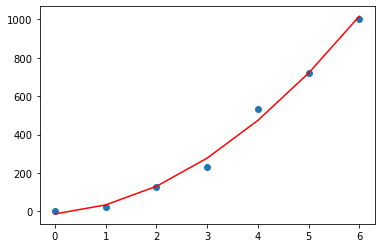

In [21]:
plt.scatter(x,y)
plt.plot(x,model.predict(x_poly),color = "red")
plt.show()

In [28]:
df = pd.read_csv("C:/Users/eren_/Data/column_2C_weka.csv")

In [29]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [33]:
abnormaldata1 = df[df["class"] =="Abnormal"]
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

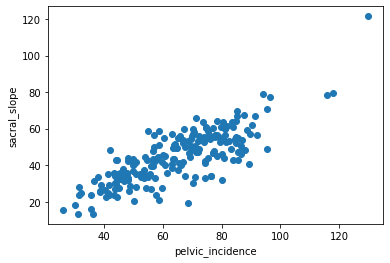

In [34]:
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(x_test)

In [40]:
print(r2_score(y_test,y_pred))

0.5153963798401999


In [41]:
poly = PolynomialFeatures(degree=4,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test_trans)

In [44]:
print(r2_score(y_test,y_pred))

0.5044249535927481


In [45]:
X_new = np.linspace(0,132,200).reshape(200,1) #0.66

In [46]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

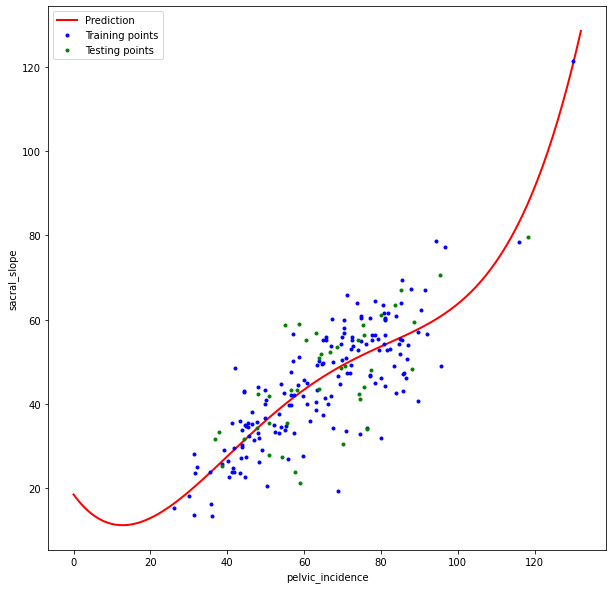

In [49]:
plt.figure(figsize=[10,10])
plt.plot(X_new,y_new, "r-",linewidth=2,label="Prediction")
plt.plot(x_train,y_train,"b.",label ="Training points")
plt.plot(x_test,y_test,"g.",label="Testing points")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()